# 1. Importación de librerías

In [1]:
import pandas as pd                # manipulación de datos 
import numpy as np                 # librería numérica
import matplotlib.pyplot as plt    # librería de graficación
import datetime as datetime        # librería para manejo de fechas y hora

# 2. El formato del archivo

Los archivos de datos *csv* pueden tener una gran variedad de formatos. La función **read_csv()** de la clase **Dataframe** es muy versátil (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

En este laboratorio utlizaremos como ejemplo un archivo cuyo formato tiene varias opciones que no son las que espera por defecto **read_csv()**. Este ejemplo nos permitirá explorar:
* La codificación del rchivo
* El separador de campos
* El inidicador de punto decimal
* La interpretación de las fechas



## 2.1. La codificación

**read_csv()** espera por defecto que la codificación del archivo set *UTF-8*. Si este no es el caso, al intentar leer el archivo puede aparecer un error, o leer de forma errónea los caracteres especiales. Lo mismo puede suceder al usar la función **readline()**

El argumento mediante el que se especifica la codificación es **encoding**.


In [2]:
filename="data-02.csv"
#f = open(filename, "r")
f = open(filename, "r", encoding="iso8859-15")
l1=f.readline()
l2=f.readline()
l3=f.readline()
print(l1)
print(l2)
print(l3)

(AÑO-MES-DÍA)	HORA	I_A	I_B	I_C	KVA_Tot	kVAr_Tot	kW_Tot	V_A_B	V_B_C	V_C_A

2016-10-05	11:00:00	109,287040710449	110,147361755371	110,887046813965	2103,85424804688	277,951416015625	2085,45751953125	11013,0166015625	11043,22265625	11054,0166015625

2016-10-05	12:00:00	111,300003051758	111,064903259277	113,138160705566	2197,02221679688	328,640533447266	2172,8466796875	11079,0302734375	11115,412109375	11123,236328125



In [3]:
#DF=pd.read_csv(filename)
DF=pd.read_csv(filename,encoding='iso8859')
DF.head(3)

,,,,,,,,,(AÑO-MES-DÍA)\tHORA\tI_A\tI_B\tI_C\tKVA_Tot\tkVAr_Tot\tkW_Tot\tV_A_B\tV_B_C\tV_C_A
2016-10-05\t11:00:00\t109,287040710449\t110,147361755371\t110,887046813965\t2103,85424804688\t277,951416015625\t2085,45751953125\t11013,0166015625\t11043,22265625\t11054,166015625.0
2016-10-05\t12:00:00\t111,300003051758\t111,064903259277\t113,138160705566\t2197,02221679688\t328,640533447266\t2172,8466796875\t11079,0302734375\t11115,412109375\t11123,236328125.0
2016-10-05\t13:00:00\t105,136642456055\t105,236640930176\t107,071754455566\t2051,41186523438\t302,450408935547\t2028,59521484375\t11192,564453125\t11220,931640625\t11235,48046875.0


## 2.2 El separador de campos

**read_csv()** espera por defecto que el separador de campos sea la coma (','). Si este no es el caso, al intentar leer el archivo detectará de forma errónea las columnas.

El argumento mediante el que se especifica el separador es **sep**.


In [4]:
DF=pd.read_csv(filename, sep='\t',encoding='iso8859_15')
DF.head(3)

,(AÑO-MES-DÍA),HORA,I_A,I_B,I_C,KVA_Tot,kVAr_Tot,kW_Tot,V_A_B,V_B_C,V_C_A
0,2016-10-05,11:00:00,"109,287040710449","110,147361755371","110,887046813965","2103,85424804688","277,951416015625","2085,45751953125","11013,0166015625","11043,22265625","11054,0166015625"
1,2016-10-05,12:00:00,"111,300003051758","111,064903259277","113,138160705566","2197,02221679688","328,640533447266","2172,8466796875","11079,0302734375","11115,412109375","11123,236328125"
2,2016-10-05,13:00:00,"105,136642456055","105,236640930176","107,071754455566","2051,41186523438","302,450408935547","2028,59521484375","11192,564453125","11220,931640625","11235,48046875"


## 2.3. El indicador de punto decimal
read_csv() espera por defecto que el separador de campos sea el punto (','). Si este no es el caso, al intentar leer el archivo detectará de forma errónea los datos numéricos.

El argumento mediante el que se especifica el separador es **decimal**.


In [5]:
DF=pd.read_csv(filename, sep='\t',encoding='iso8859_15')
#DF=pd.read_csv(filename, sep='\t',decimal=',',encoding='iso8859_15')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22417 entries, 0 to 22416
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   (AÑO-MES-DÍA)  22417 non-null  object
 1   HORA           22417 non-null  object
 2   I_A            22416 non-null  object
 3   I_B            22417 non-null  object
 4   I_C            22417 non-null  object
 5   KVA_Tot        22417 non-null  object
 6   kVAr_Tot       22417 non-null  object
 7   kW_Tot         22417 non-null  object
 8   V_A_B          22417 non-null  object
 9   V_B_C          22417 non-null  object
 10  V_C_A          22417 non-null  object
dtypes: object(11)
memory usage: 1.9+ MB


## 2.4. La interpretación de las fechas

**read_csv()** puede leer la información de varias columnas para intentar deducir una fecha y una hora a aprtir de ellas. 

Para ello, el argumento **parse_dates** debe contener la lista de las columnas a procesar:

In [6]:
DF=pd.read_csv(filename, sep='\t',decimal=',',encoding='iso8859_15')
DF.head(3)
#DF.info()

,(AÑO-MES-DÍA),HORA,I_A,I_B,I_C,KVA_Tot,kVAr_Tot,kW_Tot,V_A_B,V_B_C,V_C_A
0,2016-10-05,11:00:00,109.287041,110.147362,110.887047,2103.854248,277.951416,2085.457520,11013.016602,11043.222656,11054.016602
1,2016-10-05,12:00:00,111.300003,111.064903,113.138161,2197.022217,328.640533,2172.846680,11079.030273,11115.412109,11123.236328
2,2016-10-05,13:00:00,105.136642,105.236641,107.071754,2051.411865,302.450409,2028.595215,11192.564453,11220.931641,11235.480469


In [7]:
#DF=pd.read_csv(filename, sep='\t',decimal=',',encoding='iso8859_15')
DF=pd.read_csv(filename, sep='\t',decimal=',',parse_dates=[['(AÑO-MES-DÍA)','HORA']],encoding='iso8859_15')
DF.head(3)
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22417 entries, 0 to 22416
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (AÑO-MES-DÍA)_HORA  22417 non-null  datetime64[ns]
 1   I_A                 22416 non-null  float64       
 2   I_B                 22417 non-null  float64       
 3   I_C                 22417 non-null  float64       
 4   KVA_Tot             22417 non-null  float64       
 5   kVAr_Tot            22417 non-null  float64       
 6   kW_Tot              22417 non-null  float64       
 7   V_A_B               22417 non-null  float64       
 8   V_B_C               22417 non-null  float64       
 9   V_C_A               22417 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.7 MB


## 2.5. Cambio de nombre de las columnas

Es conveniente utilizar nombres para las columnas que sean inteligibles y cortos. Para cambiar el nombre de las columnas se puede emplear la instrucción **rename()**

In [12]:
filename="data-02.csv"
DF=pd.read_csv(filename, sep='\t',decimal=',',parse_dates=[['(AÑO-MES-DÍA)','HORA']],encoding='iso8859_15')
columnas={'(AÑO-MES-DÍA)_HORA': 'T',
          'KVA_Tot'           : 'S',      #Potencia aparente
          'kVAr_Tot'          : 'Q',      #Potencia reactiva
          'kW_Tot'            : 'P',      #Potencia activa
          'I_A'               : 'Ia',
          'I_B'               : 'Ib',
          'I_C'               : 'Ic',
          'V_A_B'             : 'Vab',
          'V_B_C'             : 'Vbc',
          'V_C_A'             : 'Vca'}
DF=DF.rename(columns=columnas)
DF.head(3)

,T,Ia,Ib,Ic,S,Q,P,Vab,Vbc,Vca
0,2016-10-05 11:00:00,109.287041,110.147362,110.887047,2103.854248,277.951416,2085.457520,11013.016602,11043.222656,11054.016602
1,2016-10-05 12:00:00,111.300003,111.064903,113.138161,2197.022217,328.640533,2172.846680,11079.030273,11115.412109,11123.236328
2,2016-10-05 13:00:00,105.136642,105.236641,107.071754,2051.411865,302.450409,2028.595215,11192.564453,11220.931641,11235.480469


# 3. Calidad de los datos

## 3.1. Series de tiempo incompletas

Si los datos está organizados en el tiempo, es necesario verificar si faltan registros. Una forma rápida de hacerlo es graficar la columna del tiempo: si no faltan registros, el resultado debe ser una linea recta. Los registros faltantes se evidencias como saltos.

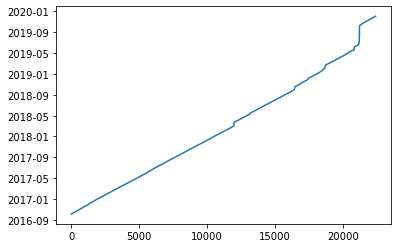

In [13]:
plt.plot(DF['T'])

## 3.2. Detección de campos faltantes

Aun cuando no haya registros faltantes, es posible que dentro de un registro haya campos faltantes. La función **isnull()** (alias de **isna()**) retorna un arreglo booleano que es **True** si el valor correspondiente está ausente, o es **numpy.NaN**.

Es necesario deidir cómo tratar los campos faltantes. Si la decisión consiste en eliminar los registros que tengan al menos un dato faltante, puede usarse la función **dropna()**.

In [14]:
#DF.isnull()
DF.isnull().sum()

T      0
Ia     1
Ib     0
Ic     0
S      0
Q      0
P      0
Vab    0
Vbc    0
Vca    0
dtype: int64

In [26]:
caliz = DF['Ia'].interpolate()  #Lo rellenamos con interpolación

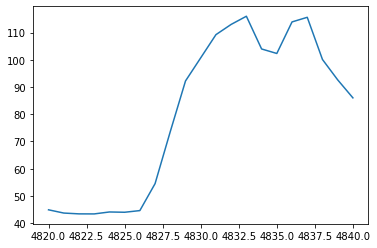

In [27]:
caliz.iloc[4820:4841].plot()

In [28]:
DF.dropna(inplace=True)
DF.isnull().sum()

T      0
Ia     0
Ib     0
Ic     0
S      0
Q      0
P      0
Vab    0
Vbc    0
Vca    0
dtype: int64

# 4. Verificaciones basadas en el conocimiento del dominio

Es necesario aprovechar el conocimiento específico sobre el problema para detectar posibles errores en los datos disponibles.

## 4.1. Visualización de cada variable

Podemos trazar los histogramas y los diagramas de caja de cada variable por separado para tener una primera aproximación sobre sus valores.

Conviene agrupar los diagramas en variables afines (comparables entre sí). En nuestro ejemplo, podemos agrupar las gráficas de tensiones, corrientes y potencias.

Histogramas de tensiones:


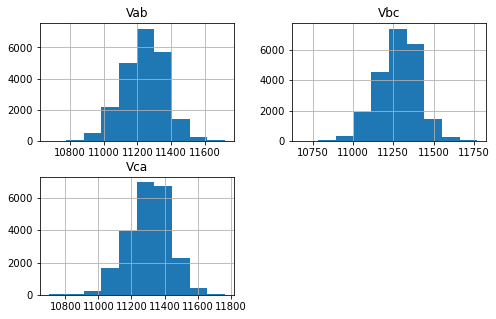

Histogramas de corrientes:


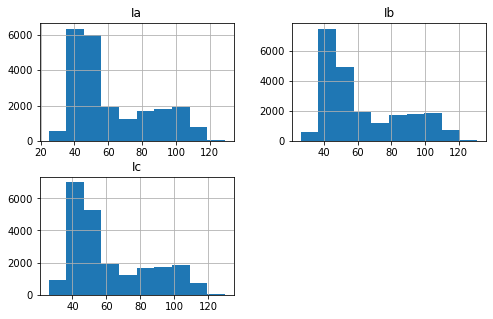

Histogramas de potencias:


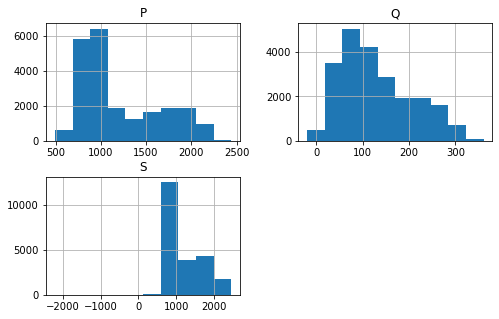

In [29]:
DF[['Vab','Vbc','Vca']].hist(figsize=(8,5))
print("Histogramas de tensiones:")
plt.show()
print("Histogramas de corrientes:")
DF[['Ia','Ib','Ic']].hist(figsize=(8,5))
plt.show()
print("Histogramas de potencias:")
DF[['S','P','Q']].hist(figsize=(8,5))
plt.show()

Diagrama de cajas de tensiones:


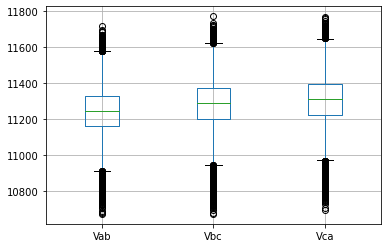

Diagrama de cajas de corrientes:


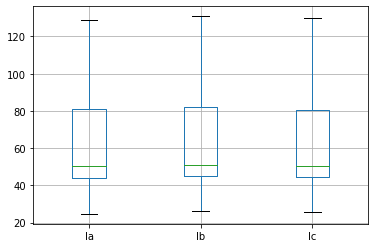

Diagrama de cajas de potencias:


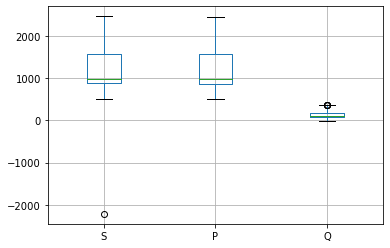

In [30]:
print("Diagrama de cajas de tensiones:")
DF[['Vab','Vbc','Vca']].boxplot()
plt.show()
print("Diagrama de cajas de corrientes:")
DF[['Ia','Ib','Ic']].boxplot()
plt.show()
print("Diagrama de cajas de potencias:")
DF[['S','P','Q']].boxplot()
plt.show()

## 4.2. Lecturas fuera del rango

Una primera verificación consiste en buscar valores que estén por fuera del rango posible. Por ejemplo, si existen valores negativos para variables que solo puedan ser positivas.

In [31]:
DF.describe()

,Ia,Ib,Ic,S,Q,P,Vab,Vbc,Vca
count,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000
mean,61.810008,62.623628,61.781656,1206.739789,129.982215,1199.073917,11241.515239,11281.401320,11305.781581
std,23.375955,23.524791,23.273978,447.287611,77.245058,442.339751,124.864117,128.451599,128.644208
min,24.664812,26.232407,25.916203,-2215.108398,-19.621632,493.324463,10674.580078,10676.218750,10698.085938
25%,44.221636,44.772460,44.534078,871.486267,68.543005,868.582169,11161.538330,11201.273682,11224.914062
50%,50.276550,50.899647,50.434864,987.817871,112.698597,982.145905,11246.754883,11289.110840,11312.954590
75%,81.207094,82.207182,80.714903,1579.688782,184.000000,1568.394592,11328.356201,11370.660400,11394.140869
max,128.927322,130.877411,129.722717,2462.354492,360.692780,2441.354492,11717.961914,11771.569336,11765.741211


## 4.3. Eliminación de datos fuera de rango

En el ejemplo, se ha detectado la presencia de datos de potencia aparente ilógicos, porque esa variable no puede ser negativa. Para identificar cuántos y cuáles registros presentan ese error, podemos filtrar el *Dataframe* y luego tomar solo los registros en donde no sucede el error:

In [32]:
DF[DF["S"]<0]

,T,Ia,Ib,Ic,S,Q,P,Vab,Vbc,Vca
4837,2017-05-02 16:00:00,115.599998,116.492249,114.879852,-2215.108398,260.185974,2199.093018,11165.388672,11172.003906,11244.439453


In [52]:
#La potencia aparente compleja = raíz(P2 + Q2)
import math

caliz = DF.copy()
caliz.loc[caliz["S"]<0, 'S'] = math.sqrt(pow(caliz.loc[caliz["S"]<0, 'P'], 2) + pow(caliz.loc[caliz["S"]<0, 'Q'], 2))
caliz.loc[4837]

T      2017-05-02 16:00:00
Ia                   115.6
Ib                 116.492
Ic                  114.88
S                  2214.43
Q                  260.186
P                  2199.09
Vab                11165.4
Vbc                  11172
Vca                11244.4
Name: 4837, dtype: object

In [53]:
# El nuevo Data Frame
DF=DF[DF["S"]>=0].copy()

#Verificación
DF.describe()

,Ia,Ib,Ic,S,Q,P,Vab,Vbc,Vca
count,22415.000000,22415.000000,22415.000000,22415.000000,22415.000000,22415.000000,22415.000000,22415.000000,22415.000000
mean,61.807609,62.621225,61.779287,1206.892448,129.976407,1199.029303,11241.518635,11281.406200,11305.784317
std,23.373715,23.522563,23.271795,446.713231,77.241885,442.299182,124.865867,128.452386,128.646425
min,24.664812,26.232407,25.916203,494.134186,-19.621632,493.324463,10674.580078,10676.218750,10698.085938
25%,44.221596,44.772448,44.533941,871.503479,68.542934,868.575287,11161.536621,11201.275391,11224.909180
50%,50.275703,50.899292,50.434849,987.918640,112.686523,982.136169,11246.764648,11289.119141,11312.956055
75%,81.206837,82.203106,80.709824,1579.754272,183.997177,1568.241333,11328.363770,11370.661621,11394.141113
max,128.927322,130.877411,129.722717,2462.354492,360.692780,2441.354492,11717.961914,11771.569336,11765.741211


## 4.4. Factor de potencia
Podemos calcular el factor de potencia, para darnos una mejor idea sobre las características técnicas de los datos. Una vez calculado, podemos graficar su evolución:

Para calcular el factor de potencia se divide la potencia activa, sobre la potencia aparente

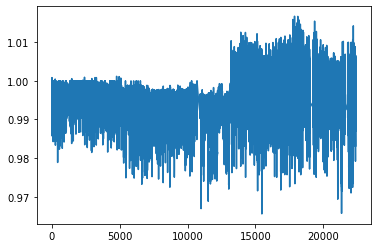

In [54]:
fp1=DF['P']/DF['S']
plt.plot(fp1)

Hay un cambio evidente en un punto de la serie. Adeás, a partir de ese cambio aparecen valores absurdos del factor de potencia (mayores a 1).

El factor de potencia no pueden ser mayores a 1.

Para explorar ese fenómeno, podemos calcular el factor de potencia a partir de las mediciones de potencia reactiva y aparente.

También se puede calcular el factor de potencia en base a la potencia activa y reactiva usando el coseno del acotangente de la reactiva / activa. Me imagino que no se usó porque sospechamos de la veracidad de la potencia activa.

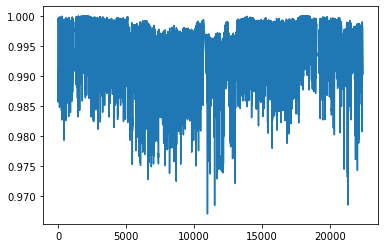

In [55]:
tmp=DF['Q']/DF['S']
fp2=np.cos(np.arcsin(tmp))
plt.plot(fp2)

Para comparar las dos versiones que hemos calculado del factor de potencia, trazamos dos nubes de puntos: una con todos los datos, y otra con los primeros 13000 datos (antes de la aparición de valores ilógicos)

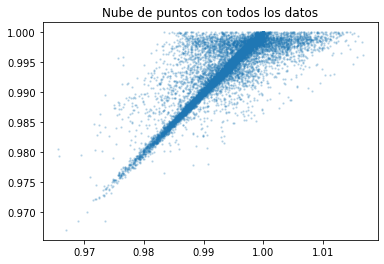

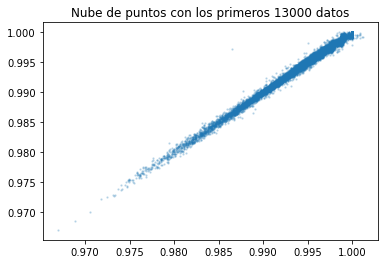

In [56]:
plt.scatter(fp1,fp2,s=2,alpha=0.2)
plt.title("Nube de puntos con todos los datos")
plt.show()
plt.title("Nube de puntos con los primeros 13000 datos")
plt.scatter(fp1[0:13000],fp2[0:13000],s=2,alpha=0.2)
plt.show()

También podemos comparar las dos versiones del factor de potencia, calculamos el error relativo y lo graficamos:

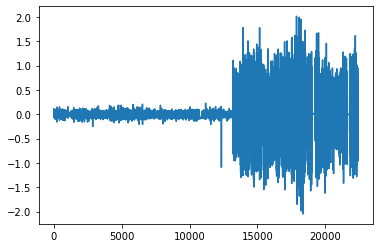

In [20]:
Dfp=(fp1-fp2)/fp1*100;
plt.plot(Dfp)

# 4.5. Desbalance del sistema trifásico

También podemos calcular los desbalances de corriente y tensión del sistema trifásico. Para ello, calculamos la mayor desviación del valor promedio de las mediciones. En el caso de las corrientes empleamos:

$Im=\frac{Ia + Ib + Ic}{3}$

$dI=\max_j \frac{|Ij-Im|}{Im}$

Y en el de las tensiones:

$Vm=\frac{Vab + Vbc + Vca}{3}$

$dV=\max_j \frac{|Vj-Vm|}{Vm}$

In [58]:
#Desbalance de corrientes
Im=(DF['Ia'] + DF['Ib'] + DF['Ic'])/3
DF['dIa']=np.abs(DF['Ia']-Im)/Im
DF['dIb']=np.abs(DF['Ib']-Im)/Im
DF['dIc']=np.abs(DF['Ic']-Im)/Im
DF['dI']=DF[['dIa','dIb','dIc']].max(axis=1)
DF.drop(columns=['dIa','dIb','dIc'],inplace=True)

#Desbalance de tensiones
Vm=(DF['Vab'] + DF['Vbc'] + DF['Vca'])/3
DF['dVab']=np.abs(DF['Vab']-Vm)/Vm
DF['dVbc']=np.abs(DF['Vbc']-Vm)/Vm
DF['dVca']=np.abs(DF['Vca']-Vm)/Vm
DF['dV']=DF[['dVab','dVbc','dVca']].max(axis=1)
DF.drop(columns=['dVab','dVbc','dVca'],inplace=True)
DF.head(3)

,T,Ia,Ib,Ic,S,Q,P,Vab,Vbc,Vca,dI,dV
0,2016-10-05 11:00:00,109.287041,110.147362,110.887047,2103.854248,277.951416,2085.457520,11013.016602,11043.222656,11054.016602,0.007448,0.002151
1,2016-10-05 12:00:00,111.300003,111.064903,113.138161,2197.022217,328.640533,2172.846680,11079.030273,11115.412109,11123.236328,0.011658,0.002419
2,2016-10-05 13:00:00,105.136642,105.236641,107.071754,2051.411865,302.450409,2028.595215,11192.564453,11220.931641,11235.480469,0.011877,0.002118


Visualizamos ahora los desbalances usando histogramas y diagramas de cajas:

Histogramas de desbalances:


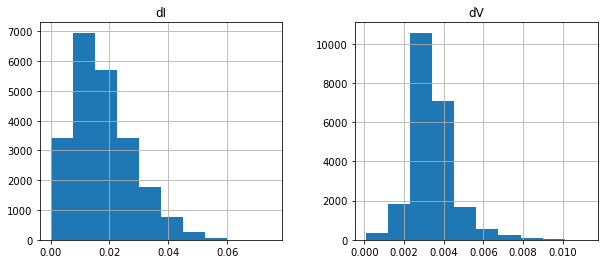

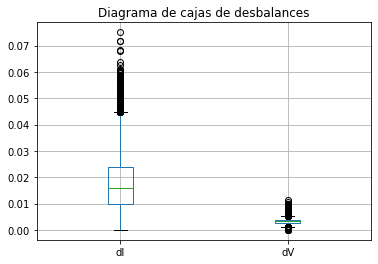

In [59]:
DF[['dI','dV']].hist(figsize=(10,4))
print("Histogramas de desbalances:")
plt.show()
DF[['dI','dV']].boxplot()
plt.title("Diagrama de cajas de desbalances")
plt.show()

¿Estarán relacionados los dos desbalances?

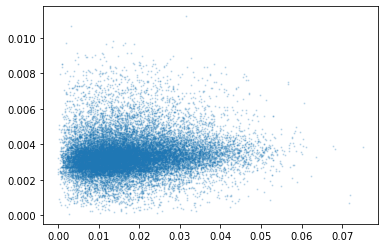

In [60]:
plt.scatter(DF['dI'],DF['dV'],s=1,alpha=0.2)
plt.show()


# 5. Ejercicio sugerido

El archivo *dataEj.csv* está codificado en *UTF-8*, los campos están separados por el caracter ';', y usa como separador de punto decimal el punto ('.').

Construya un dataframe con los datos del archivo *dataEj.csv* y determine:
* El número de columnas y filas en el archivo.
* Cuántos datos faltantes hay.
* El número de datos negativos en la columna maracada como 'P', que representa la potencia activa.


In [65]:
DF2 = pd.read_csv("dataEj.csv", sep=";", decimal=".", parse_dates=[['FECHA', 'HORA']], encoding="UTF-8")
DF2

,FECHA_HORA,IA,IB,IC,S,Q,P,VAB,VBC,VCA
0,2016-10-05 11:00:00,109.287041,110.147362,110.887047,2103.854248,277.951416,2085.457520,11013.016602,11043.222656,11054.016602
1,2016-10-05 12:00:00,111.300003,111.064903,113.138161,2197.022217,328.640533,2172.846680,11079.030273,11115.412109,11123.236328
2,2016-10-05 13:00:00,105.136642,105.236641,107.071754,2051.411865,302.450409,2028.595215,11192.564453,11220.931641,11235.480469
3,2016-10-05 14:00:00,99.702164,100.220459,100.730118,1954.322754,312.440918,1929.322754,11219.440430,11249.860352,11258.581055
4,2016-10-05 15:00:00,106.306900,103.913803,105.711502,2033.672485,305.138031,2011.672485,11178.465820,11216.954102,11220.976562
...,...,...,...,...,...,...,...,...,...,...
1958,2017-01-01 19:00:00,38.680859,37.808941,37.708942,742.336304,6.685142,742.336304,11303.113281,11347.238281,11387.447266
1959,2017-01-01 20:00:00,39.487560,37.400002,38.426796,754.679443,8.000000,754.679443,11296.300781,11338.055664,11375.914062
1960,2017-01-01 21:00:00,40.859898,39.119797,39.475838,775.835449,19.318766,775.835449,11289.489258,11328.873047,11364.380859
1961,2017-01-01 22:00:00,38.787544,36.541130,37.960754,741.109436,0.822641,741.109436,11282.676758,11319.690430,11352.847656


In [73]:
print('El número de columnas y filas en el archivo.')
print('\nFilas: ', DF.shape[0])
print('\nColumnas: ', DF.shape[1])

El número de columnas y filas en el archivo.

Filas:  22415

Columnas:  12


In [79]:
print('Datos Faltantes: ')
DF.isnull().sum()

Datos Faltantes: 


T      0
Ia     0
Ib     0
Ic     0
S      0
Q      0
P      0
Vab    0
Vbc    0
Vca    0
dI     0
dV     0
dtype: int64

In [83]:
DF[DF['P']<0].count()

T      0
Ia     0
Ib     0
Ic     0
S      0
Q      0
P      0
Vab    0
Vbc    0
Vca    0
dI     0
dV     0
dtype: int64